# Data anlysis

In [1]:
from scipy.stats import sem
from scipy.stats import t
from scipy.stats import ttest_ind
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
attendance_data_with_rain_data = pd.read_csv("processed_data/seasons_2012-2018_attendance_data.csv")

In [3]:
attendance_data_with_rain_data = attendance_data_with_rain_data[attendance_data_with_rain_data["attendance_percentage"] <= 1.25]
len(attendance_data_with_rain_data)

4818

----------------

# What factors influenced attendance rates at College Football games over the 2012 - 2018 seasons?  

## *H1. Larger stadium capacities have higher percentages of attendance than stadiums that accommodate less people.*

If you build it they will come!!

In [4]:
stadiums = attendance_data_with_rain_data["name"].unique()
average_attendance_percentages = []
capacities = []

for stadium in stadiums:
    stadium_rows = attendance_data_with_rain_data[attendance_data_with_rain_data["name"] == stadium]
    average_attendance_percentage = np.mean(stadium_rows["attendance_percentage"])
    capacity = np.mean(stadium_rows["capacity"])
    capacities.append(capacity)
    average_attendance_percentages.append(average_attendance_percentage) 
    
average_attendance_data = pd.DataFrame()
average_attendance_data["name"] = stadiums
average_attendance_data["capacity"] = capacities
average_attendance_data["average_attendance_percentage"] = average_attendance_percentages

In [5]:
largest_stadiums = average_attendance_data.nlargest(5, "capacity")
largest_stadiums[["name", "capacity", "average_attendance_percentage"]]

,name,capacity,average_attendance_percentage
155,Bristol Motor Speedway,162000.0,0.969074
77,Michigan Stadium,107601.0,1.023081
26,Beaver Stadium,106572.0,0.942074
20,Ohio Stadium,104944.0,1.012530
78,Kyle Field,102733.0,0.943094


In [6]:
smallest_stadiums = average_attendance_data.nsmallest(5, "capacity")
smallest_stadiums[["name", "capacity", "average_attendance_percentage"]]

,name,capacity,average_attendance_percentage
146,Jerry Richardson Stadium,15314.0,0.861254
11,Kibbie Dome,16000.0,0.762361
137,Warren McGuirk Alumni Stadium,17000.0,0.694376
121,Foreman Field,20118.0,1.000112
54,Houchens Industries-L. T. Smith Stadium,22113.0,0.778348


------------------------
## *H2. The higher the quality of the home team for the game week, the higher the percentage of attendance.*

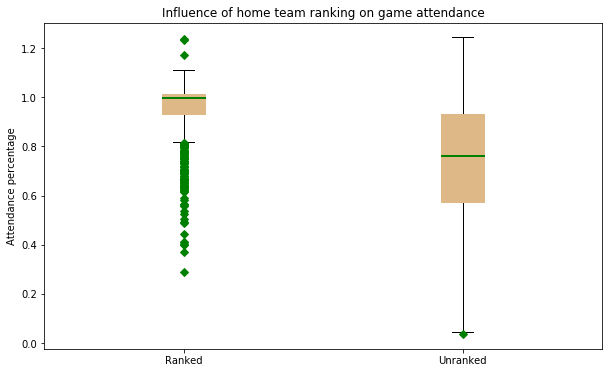

In [7]:
home_team_ranked = attendance_data_with_rain_data[attendance_data_with_rain_data["home_team_ranked_ind"] == 1]["attendance_percentage"]
home_team_unranked = attendance_data_with_rain_data[attendance_data_with_rain_data["home_team_ranked_ind"] == 0]["attendance_percentage"]

data = [home_team_ranked, home_team_unranked]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Ranked", "Unranked"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of home team ranking on game attendance")
plt.show()

In [8]:
t, p = ttest_ind(home_team_ranked, home_team_unranked, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,0.0,44.229969


--------------------
## *H3. The higher the quality of the away team for the game week, the higher the percentage of attendance.*

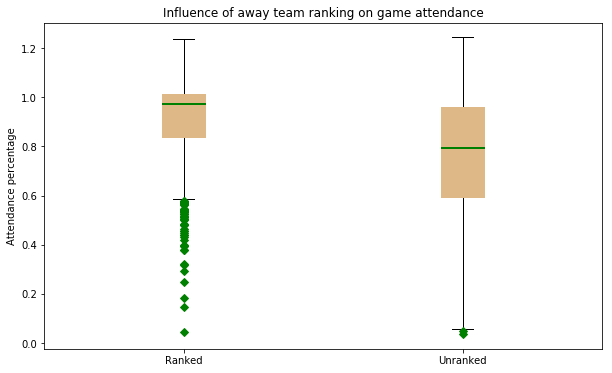

In [9]:
away_team_ranked = attendance_data_with_rain_data[attendance_data_with_rain_data["away_team_ranked_ind"] == 1]["attendance_percentage"]
away_team_unranked = attendance_data_with_rain_data[attendance_data_with_rain_data["away_team_ranked_ind"] == 0]["attendance_percentage"]

data = [away_team_ranked, away_team_unranked]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Ranked", "Unranked"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of away team ranking on game attendance")
plt.show()

In [10]:
t, p = ttest_ind(away_team_ranked, away_team_unranked, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,7.904206e-88,21.350052


---------------------
## *H4. Conference matchups have higher percentages of attendance than non-conference games.*

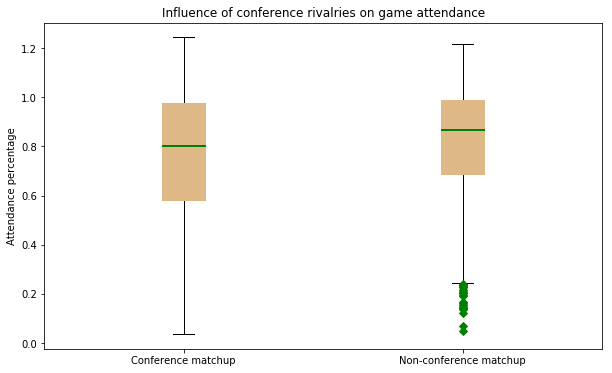

In [11]:
conference_matchups = attendance_data_with_rain_data[attendance_data_with_rain_data["conference_game"]]["attendance_percentage"]
non_conference_matchups = attendance_data_with_rain_data[attendance_data_with_rain_data["conference_game"] == False]["attendance_percentage"]

data = [conference_matchups, non_conference_matchups]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Conference matchup", "Non-conference matchup"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of conference rivalries on game attendance")
plt.show()

In [12]:
t, p = ttest_ind(conference_matchups, non_conference_matchups, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,3.167358e-17,-8.475536


--------------------------
## *H5. Games with a temperate kickoff temperature will have higher percentages of attendance than those with extremely high or extremely low temperatures.*

In [13]:
attendance_data_with_rain_data["max_temp"] = ((attendance_data_with_rain_data["max_temp"] / 10.0) * (9.0/5.0)) + 32
attendance_data_with_rain_data["min_temp"] = ((attendance_data_with_rain_data["min_temp"] / 10.0) * (9.0/5.0)) + 32

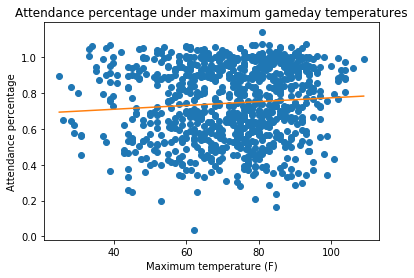

In [14]:
max_temp_attendance = attendance_data_with_rain_data[attendance_data_with_rain_data["max_temp"] >= 0]

plt.plot(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], "o")
plt.plot(np.unique(max_temp_attendance["max_temp"]), np.poly1d(np.polyfit(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], 1))(np.unique(max_temp_attendance["max_temp"])))

plt.title("Attendance percentage under maximum gameday temperatures")
plt.ylabel("Attendance percentage")
plt.xlabel("Maximum temperature (F)")
plt.show()

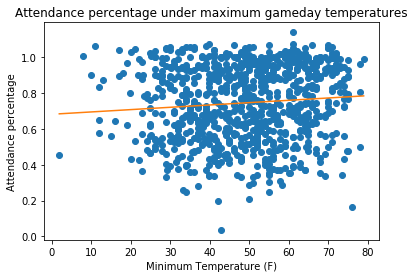

In [15]:
min_temp_attendance = attendance_data_with_rain_data[attendance_data_with_rain_data["min_temp"] >= 0]

plt.plot(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], "o")
plt.plot(np.unique(min_temp_attendance["min_temp"]), np.poly1d(np.polyfit(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], 1))(np.unique(min_temp_attendance["min_temp"])))

plt.title("Attendance percentage under maximum gameday temperatures")
plt.ylabel("Attendance percentage")
plt.xlabel("Minimum Temperature (F)")
plt.show()

-----------------------
## H6. *Games without rain will have higher percentages of attendance than those with rain.*

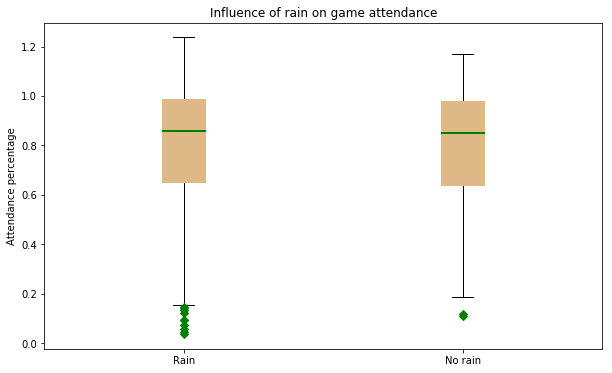

In [16]:
attendance_with_rain = attendance_data_with_rain_data[attendance_data_with_rain_data["rain"] == 0]["attendance_percentage"]
attendance_without_rain = attendance_data_with_rain_data[attendance_data_with_rain_data["rain"] > 0]["attendance_percentage"]

data = [attendance_with_rain, attendance_without_rain]
fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(data, 0, "gD", patch_artist=True, labels=["Rain", "No rain"])

for box in bp["boxes"]:
    box.set(color="burlywood", linewidth=2)

for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.ylabel("Attendance percentage")
plt.title("Influence of rain on game attendance")
plt.show()

In [17]:
t, p = ttest_ind(attendance_with_rain, attendance_without_rain, equal_var=False)
pd.DataFrame({"t_value": [t], "p_value": [p]})

,p_value,t_value
0,0.664563,-0.433763
